# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Find the attributes of used car sales to understand what the biggest contributors to a sale are.

In [292]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score




In [7]:
vehicles = pd.read_csv('/Users/david/Documents/berkeley machine learning class/practical_application_II_starter/data/vehicles.csv')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [122]:
percent_missing = vehicles.isnull().sum() * 100 / len(vehicles)
missing_value_df = pd.DataFrame({'column_name': vehicles.columns,
                                 'percent_missing': percent_missing})

426880

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### Year of production
There are very incorrect values for the year. For example, multiple entries for 'corvette', a model produced by Chevrolet beginning in 1953:

In [22]:
vehicles.query('model == "corvette" and year < 1953')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
1698,7302752687,birmingham,0,1903.0,chevrolet,corvette,NaN,NaN,gas,NaN,clean,NaN,7275856000,NaN,NaN,other,NaN,al
83424,7302755836,eastern CT,0,1903.0,chevrolet,corvette,NaN,NaN,gas,NaN,clean,NaN,7275856000,NaN,NaN,other,NaN,ct
91911,7302753935,delaware,0,1903.0,chevrolet,corvette,NaN,NaN,gas,NaN,clean,NaN,7275856000,NaN,NaN,other,NaN,de
127058,7302752433,savannah / hinesville,0,1903.0,chevrolet,corvette,NaN,NaN,gas,NaN,clean,NaN,7275856000,NaN,NaN,other,NaN,ga
153388,7302753554,indianapolis,0,1903.0,chevrolet,corvette,NaN,NaN,gas,NaN,clean,NaN,7275856000,NaN,NaN,other,NaN,in
170728,7302755053,bowling green,0,1903.0,chevrolet,corvette,NaN,NaN,gas,NaN,clean,NaN,7275856000,NaN,NaN,other,NaN,ky
177203,7302753780,new orleans,0,1903.0,chevrolet,corvette,NaN,NaN,gas,NaN,clean,NaN,7275856000,NaN,NaN,other,NaN,la
223115,7302753302,springfield,0,1903.0,chevrolet,corvette,NaN,NaN,gas,NaN,clean,NaN,7275856000,NaN,NaN,other,NaN,mo
240104,7302755644,outer banks,0,1903.0,chevrolet,corvette,NaN,NaN,gas,NaN,clean,NaN,7275856000,NaN,NaN,other,NaN,nc
299698,7302754158,dayton / springfield,0,1903.0,chevrolet,corvette,NaN,NaN,gas,NaN,clean,NaN,7275856000,NaN,NaN,other,NaN,oh


So my suspicion here is that 1903 is some kind of default year. Other fields in these records are also blank, and they all share the same VIN. I'm going to look at all the values for 1903

In [24]:
len(vehicles.query('year == 1903'))

12

Since it's the same number perhaps my suspicions are correct. Anything with a year of 1903 is bad data. What about other early dates?

In [45]:
vehicles.query('year > 1903 and year < 1911')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
289145,7317015363,cincinnati,3990,1905.0,chevrolet,astro cargo,excellent,8 cylinders,gas,202570.0,clean,automatic,1GCDM19XX5B120539,rwd,full-size,van,white,oh
322057,7316907319,portland,15000,1910.0,NaN,1910 MAXWELL AA,excellent,other,gas,1.0,clean,manual,NaN,NaN,NaN,convertible,red,or
383491,7310975905,tyler / east TX,750,1909.0,NaN,Mitsubshi FBC15K,salvage,other,electric,999999.0,missing,automatic,NaN,NaN,full-size,other,custom,tx
407763,7316913715,seattle-tacoma,15000,1910.0,NaN,maxwell Aa,excellent,other,gas,100.0,clean,manual,NaN,NaN,NaN,convertible,red,wa


So we're going to drop all the rows where the year is null or 1903

In [35]:
vehicles.dropna(subset=['year'], inplace=True)
vehicles = vehicles[ vehicles['year'] != 1903 ]

There are some other issues with year, for example, this vehicle with year 1905, but seems to be an automatic transmission Chevy Astro, a model which was instroduced in 1985. Perhaps the year here is a typo or an OCR error, given the year being off by one digit. For now we're going to ignore it, because there may be a number of transcription errors throughout the data set which, without a more sophisticated review of the data (perhaps referencing model names with years of introduction), would require us to inspect the entire set manually. 

In [48]:
vehicles.query("id == 7317015363")

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
289145,7317015363,cincinnati,3990,1905.0,chevrolet,astro cargo,excellent,8 cylinders,gas,202570.0,clean,automatic,1GCDM19XX5B120539,rwd,full-size,van,white,oh


#### Vehicle condition
We see that vehicle condition is some kind of category with a small set of possible values.

In [43]:
vehicles['condition'].unique()

array(['good', 'excellent', 'fair', nan, 'like new', 'new', 'salvage'],
      dtype=object)

We'll convert anything not already a string (i.e. the NaN value) into a string 'other', making the value of the whole column a string.

In [54]:
[s for s in vehicles['condition'].unique() if type(s) == type('str')]

['good', 'excellent', 'fair', 'like new', 'new', 'salvage']

In [67]:
def convert_nonstring_to_other(x):
    if type(x) != type('str'):
        return 'other'
    else:
        return x

vehicles['condition'] = vehicles['condition'].apply(convert_nonstring_to_other)

vehicles['condition'].unique()

/var/folders/3n/wcrpdgxx6jz_gpc28s29jglh0000gn/T/ipykernel_95060/1234696681.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles['condition'] = vehicles['condition'].apply(convert_nonstring_to_other)


array(['good', 'excellent', 'fair', 'other', 'like new', 'new', 'salvage'],
      dtype=object)

In [71]:
len(vehicles['condition']) - len(vehicles['condition'].isna())

0

#### Paint color 
paint_color could be a similar categorical case

In [72]:
vehicles['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', nan, 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [73]:
def convert_nonstring_to_unknown(x):
    if type(x) != type('str'):
        return 'unknown'
    else:
        return x

In [75]:
vehicles['paint_color'] = vehicles['paint_color'].apply(convert_nonstring_to_unknown)

/var/folders/3n/wcrpdgxx6jz_gpc28s29jglh0000gn/T/ipykernel_95060/979462163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles['paint_color'] = vehicles['paint_color'].apply(convert_nonstring_to_unknown)


In [76]:
vehicles['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', 'unknown',
       'brown', 'yellow', 'orange', 'green', 'custom', 'purple'],
      dtype=object)

In [81]:
vehicles['type'].unique()

array(['pickup', 'truck', 'other', nan, 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [82]:
vehicles['type'] = vehicles['type'].apply(convert_nonstring_to_unknown)

/var/folders/3n/wcrpdgxx6jz_gpc28s29jglh0000gn/T/ipykernel_95060/980769075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles['type'] = vehicles['type'].apply(convert_nonstring_to_unknown)


In [87]:
vehicles['size'] = vehicles['size'].apply(convert_nonstring_to_unknown)

/var/folders/3n/wcrpdgxx6jz_gpc28s29jglh0000gn/T/ipykernel_95060/3750209431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles['size'] = vehicles['size'].apply(convert_nonstring_to_unknown)


In [106]:
vehicles['drive'].unique()
vehicles['manufacturer'] = vehicles['manufacturer'].apply(convert_nonstring_to_unknown)
vehicles['manufacturer'].unique()

/var/folders/3n/wcrpdgxx6jz_gpc28s29jglh0000gn/T/ipykernel_95060/4170043935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles['manufacturer'] = vehicles['manufacturer'].apply(convert_nonstring_to_unknown)


array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'unknown', 'acura', 'hyundai', 'mercedes-benz', 'bmw',
       'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'ferrari',
       'mini', 'pontiac', 'fiat', 'tesla', 'saturn', 'mercury',
       'harley-davidson', 'datsun', 'aston-martin', 'land rover',
       'morgan'], dtype=object)

In [111]:
vehicles['model'] = vehicles['model'].apply(convert_nonstring_to_unknown)
vehicles['cylinders'] = vehicles['cylinders'].apply(convert_nonstring_to_unknown)

/var/folders/3n/wcrpdgxx6jz_gpc28s29jglh0000gn/T/ipykernel_95060/4128624133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles['model'] = vehicles['model'].apply(convert_nonstring_to_unknown)
/var/folders/3n/wcrpdgxx6jz_gpc28s29jglh0000gn/T/ipykernel_95060/4128624133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles['cylinders'] = vehicles['cylinders'].apply(convert_nonstring_to_unknown)


In [114]:
vehicles['fuel'] = vehicles['fuel'].apply(convert_nonstring_to_unknown)

/var/folders/3n/wcrpdgxx6jz_gpc28s29jglh0000gn/T/ipykernel_95060/2686546260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles['fuel'] = vehicles['fuel'].apply(convert_nonstring_to_unknown)


In [121]:
vehicles = vehicles.dropna()


Drop the VIN since that doesn't matter

In [124]:
vehicles = vehicles.drop('VIN', axis=1)

In [128]:
vehicles['year'] = vehicles['year'].astype('int')

Individually pluck out a lot of bad price rows. Eg '12345678'; million-dollar vehicles, etc. Can believe a >$300K ferrari or porsche; not a Dodge Journey which retails new for $20K

In [177]:
poorly_priced_ids = [
    7308297502, 
    7314124996, 
    7315524207, 
    7307876060, 
    7316737396, 
    7302113550, 
    7302112231,
    7316736586,
    7302117601
]
vehicles.drop(vehicles[ (vehicles['price'].astype('str').str.startswith('12345')) ].index, inplace=True)
vehicles.drop(vehicles[ vehicles['id'].isin(poorly_priced_ids) ].index, inplace=True)

Yeah, gonna get rid of a whole bunch of incongruous values -- 'new' and 'like new' cars with more than 300000. If I'm doing data analytics for a used car dealership I'll wait for them to tell me I'm wrong here, otherwise this looks like bad data.

In [295]:
suspicious_condition = ['new', 'like new']
len(vehicles.query('condition in @suspicious_condition and odometer > 200000'))

0

In [186]:
vehicles.drop(vehicles.query('condition in @suspicious_condition and odometer > 200000').index, inplace=True)


In [202]:
models = vehicles.model.unique()
models[:20]

array(['sierra 1500 crew cab slt', 'silverado 1500',
       'silverado 1500 crew', 'tundra double cab sr',
       'sierra 2500 hd extended cab', 'silverado 1500 double',
       'colorado extended cab', 'corvette grand sport',
       'wrangler unlimited sport', 'silverado 1500 regular',
       'colorado crew cab z71', 'tacoma access cab pickup',
       'camaro ss coupe 2d', 'tundra crewmax sr5 pickup',
       'ranger supercrew xl pickup', 'frontier crew cab pro-4x',
       'f150 super cab xl pickup 4d', 'tacoma double cab sr5',
       'wrangler sport suv 2d', 'f150 supercrew cab xlt'], dtype=object)

We're also going to drop the models column because it's a data cleanup nightmare. There are trim levels mixed in with base models, mixed in with data that has nothing to do with the model.

In [204]:
vehicles.drop(columns=['model'], inplace=True)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

1. Make sure the data is in a format which can be imported.
2. import the data to a pandas data frame
3. look at the head() of the data frame to see what kind of data is in the data set
4. run df.info() on the data set to see what that tells us
5. compare various columns to car sales using pandas.corr
6. plot values
7. remove rows with nulls (dropna)
8. look for periodic data if there is some time series component
9. remove outliers


In [218]:
# predictions based on manufacturer alone
# dummies
manu_encoded = pd.get_dummies(vehicles['manufacturer'])


In [219]:
manu_encoded

,acura,alfa-romeo,aston-martin,audi,bmw,buick,cadillac,chevrolet,chrysler,datsun,...,porsche,ram,rover,saturn,subaru,tesla,toyota,unknown,volkswagen,volvo
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426877,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
encoded_manufacturer = pd.concat([vehicles, manu_encoded], axis=1)

In [222]:
del encoded_manufacturer['manufacturer']

In [231]:
X = manu_encoded
y = vehicles['price']
manu_linreg = LinearRegression(fit_intercept=False).fit(X, y)

In [226]:
manu_linreg.coef_

array([ 22952.54208306,  28525.23873325,  45687.25      ,  26184.14364249,
        21997.97139692,  17993.38659185,  24043.68902023,  21519.1163095 ,
        12503.57228535,  19784.53846154,  18024.40280561, 110135.74666667,
        13734.71794872,  22693.80035616,  26400.62786563,  10812.28571429,
        12539.79528874,  12369.04981075,  22611.06158605,  29788.33537415,
        20764.94334252,  12678.89213038,   1319.15384615,  21315.23598715,
        23482.92778761,  15012.74043311,  22928.02745542,   5516.68408551,
        16990.59473346,  16450.54832962,  14284.30852364,   8812.8647541 ,
        34424.46205357,  29351.31458417,  28046.12226776,   6817.95419847,
        15173.35442378,  38302.81481481,  18647.04478793,  23021.25935442,
        14754.52723961,  23060.72837209])

[Text(0.5, 0, 'Manufacturer'),
 Text(0, 0.5, 'Expected price'),
 Text(0.5, 1.0, 'Price by manufacturer')]

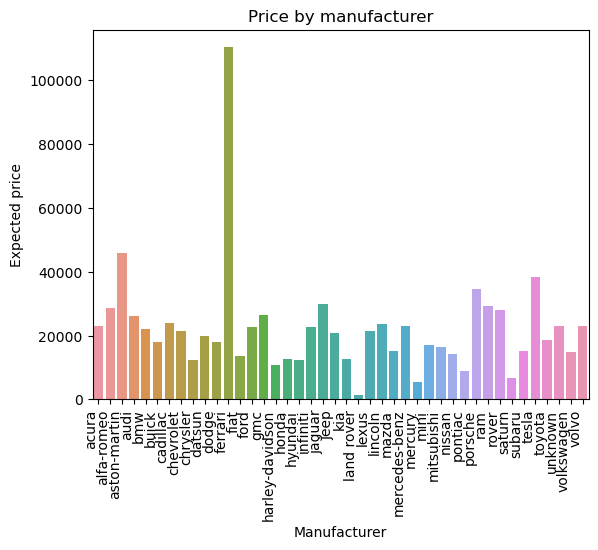

In [233]:
ax = sns.barplot(x=[colname for colname in manu_encoded.columns], y=manu_linreg.coef_)
ax.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set(xlabel="Manufacturer", ylabel='Expected price', title='Price by manufacturer')

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [234]:
vehicles[ vehicles['manufacturer'] == 'land rover']

,id,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
54495,7316727916,san diego,10000,1997,land rover,excellent,8 cylinders,gas,117115.0,clean,automatic,4wd,mid-size,offroad,red,ca
295078,7316981015,columbus,3199,2002,land rover,good,unknown,gas,145688.0,clean,automatic,unknown,unknown,SUV,unknown,oh
311457,7314876666,bend,0,2015,land rover,other,unknown,gas,11050.0,clean,automatic,rwd,unknown,sedan,unknown,or
312514,7311399404,bend,0,2015,land rover,other,unknown,gas,11050.0,clean,automatic,rwd,unknown,sedan,unknown,or
313537,7307724394,bend,0,2015,land rover,other,unknown,gas,11050.0,clean,automatic,rwd,unknown,sedan,unknown,or
316581,7314876569,eugene,0,2015,land rover,other,unknown,gas,11050.0,clean,automatic,rwd,unknown,sedan,unknown,or
317663,7311399272,eugene,0,2015,land rover,other,unknown,gas,11050.0,clean,automatic,rwd,unknown,sedan,unknown,or
319367,7314876445,medford-ashland,0,2015,land rover,other,unknown,gas,11050.0,clean,automatic,rwd,unknown,sedan,unknown,or
319802,7311399143,medford-ashland,0,2015,land rover,other,unknown,gas,11050.0,clean,automatic,rwd,unknown,sedan,unknown,or
320238,7307724200,medford-ashland,0,2015,land rover,other,unknown,gas,11050.0,clean,automatic,rwd,unknown,sedan,unknown,or


<Axes: xlabel='odometer', ylabel='price'>

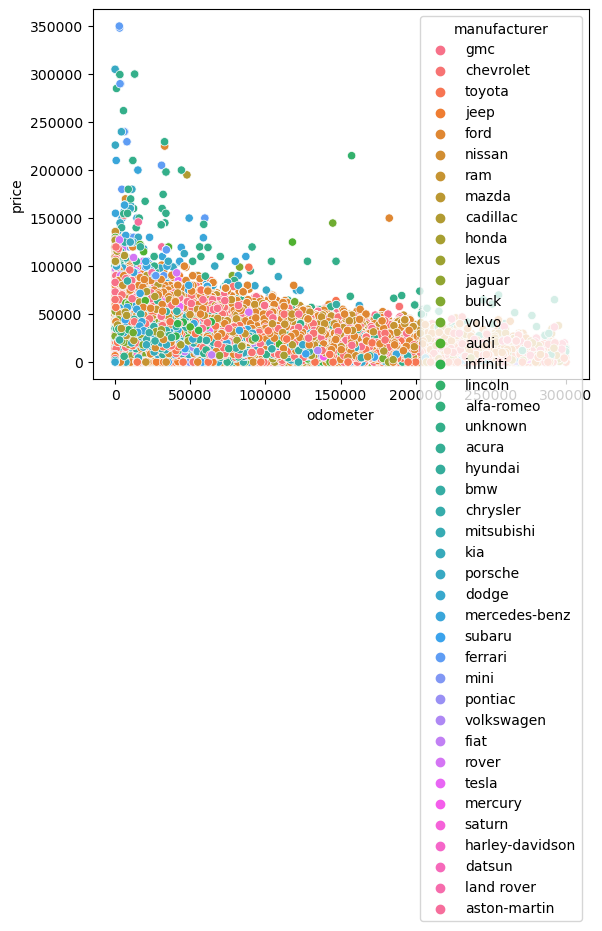

In [243]:
sns.scatterplot(vehicles[ (vehicles['price'] < 800000) & (vehicles['odometer'] < 300000)], x='odometer', y='price', hue='manufacturer')

Clearly there is a relationship between odometer reading and price as well. It looks like a negative correlation

[0.13378946]


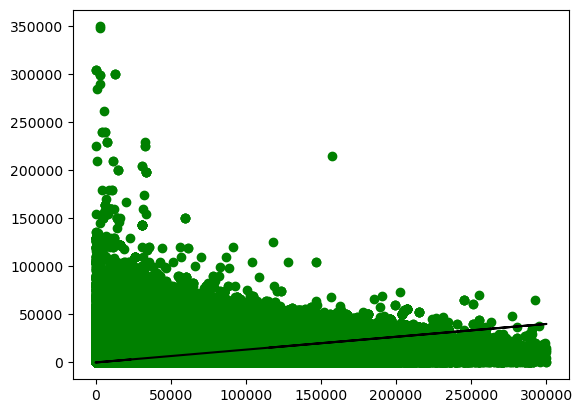

In [281]:
model = LinearRegression(fit_intercept=False)
vehicles = vehicles[ (vehicles['price'] < 800000) & (vehicles['odometer'] < 300000)]
X = vehicles[['odometer']]
y = vehicles['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
odometer_linreg = model.fit(X_train, y_train)

y_pred = odometer_linreg.predict(X_test)



print(odometer_linreg.coef_)

plt.scatter(X_train, y_train,color='g')
plt.plot(X_test, y_pred,color='k')

plt.show()



In [290]:
data = pd.get_dummies(vehicles)

In [294]:
scaler = StandardScaler()
data[['year', 'odometer']] = scaler.fit_transform(data[['year', 'odometer']])
y = data['price']
X = data
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to RMSE scores
rmse_scores = (-scores) ** 0.5

print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard deviation of RMSE:", rmse_scores.std())

RMSE scores for each fold: [5.12707113e-11 2.05207718e-10 5.56948674e-12 1.49857075e-10
 1.21642474e-11]
Mean RMSE: 8.481384766235608e-11
Standard deviation of RMSE: 7.925664710913044e-11


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.